In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt

In [2]:
# 준비작업
import pandas as pd
import numpy as np

import folium
import json

import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
rest_data_openrate = pd.read_excel("rest_data_openrate.xlsx")
rest_data_closedrate = pd.read_excel("rest_data_closedrate.xlsx")

In [4]:
rest_data_openrate

,Unnamed: 0,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,0,2017-03-16,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-03-20,종로구,평동,197039.322573,451838.986581,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-03-23,종로구,사직동,197889.897982,452238.323738,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2017-03-23,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-03-23,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,33966,2020-02-21,강동구,천호동,210929.919694,448537.406728,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,33967,2020-02-20,강동구,천호동,210929.919694,448537.406728,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,33968,2018-05-31,성동구,행당동,203523.983358,450749.018495,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,33969,2016-02-12,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
rest_data_closedrate

,Unnamed: 0,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,0,NaT,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,NaT,종로구,평동,197039.322573,451838.986581,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,NaT,종로구,사직동,197889.897982,452238.323738,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,NaT,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,NaT,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,33966,2020-03-06,강동구,천호동,210929.919694,448537.406728,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,33967,2020-03-23,강동구,천호동,210929.919694,448537.406728,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,33968,2018-06-21,성동구,행당동,203523.983358,450749.018495,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,33969,NaT,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
rest_data_openrate.drop(['Unnamed: 0'], axis=1, inplace=True)
rest_data_closedrate.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
rest_data_closedrate

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,NaT,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaT,종로구,평동,197039.322573,451838.986581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaT,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaT,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,2020-03-06,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,2020-03-23,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,2018-06-21,성동구,행당동,203523.983358,450749.018495,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,NaT,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rest_data_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,2017-03-16,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-03-20,종로구,평동,197039.322573,451838.986581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-03-23,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-03-23,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-03-23,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,2020-02-21,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,2020-02-20,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,2018-05-31,성동구,행당동,203523.983358,450749.018495,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,2016-02-12,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
rest_open_group = rest_data_openrate.groupby([rest_data_openrate.구,rest_data_openrate.동])[['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1']].sum()

In [10]:
rest_open_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동       8       4       2       1       1       7       8      16   
    논현동      13      18      10      20      15      32      21      15   
    대치동      13      17      22      29      27      29      29      20   
    도곡동       7       9       9       6       7      15       4       6   
    삼성동      17      28      35      50      50      60      77      79   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동       8       9       2      10      15      27      11      12   
    묵동        0       3       0       4       6       4       3       2   
    상봉동       5       4       5       5       7       7       2       8   
    신내동       1       3       2       2       4       5       4       6   
    중화동       2       2       3       3       4       5       3      14   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동       4       4  ...       8       4       6       6       4       4   
    논현동      15      27  ...      15      13      19      14      24      24   
    대치동      28      17  ...      16      41      18      28      28      14   
    도곡동       5      13  ...       3       6       7       3      10       7   
    삼성동      57     108  ...      57      85     106      72      65      52   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동      15      18  ...      13       9      18      20       9      25   
    묵동        3       9  ...       2       4      11       6       4       2   
    상봉동       8       7  ...       6       3       3       7       9       5   
    신내동       1       2  ...       1       5       2       6       3       1   
    중화동       4       3  ...       3       4      10       5       5       6   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동      10       6       5       4  
    논현동      30      15      22      13  
    대치동      16      32      47      20  
    도곡동       8      12       3       9  
    삼성동      80      80      75      27  
...         ...     ...     ...     ...  
중랑구 면목동      20      21      11      15  
    묵동       11      11       3       2  
    상봉동      12       9       5       6  
    신내동       4       4       3       2  
    중화동      11       2       4       6  

[277 rows x 21 columns]

In [11]:
rest_open_group_cnt = rest_data_openrate.groupby([rest_data_openrate.구,rest_data_openrate.동])['동'].count().to_frame()

In [12]:
rest_open_group_cnt

동
구   동        
강남구 개포동   117
    논현동   399
    대치동   511
    도곡동   153
    삼성동  1349
...       ...
중랑구 면목동   304
    묵동     94
    상봉동   128
    신내동    65
    중화동   102

[277 rows x 1 columns]

In [13]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = rest_open_group.index.tolist()
rowcnt2 = rest_open_group_cnt.index.tolist()

def calopenrate(i,j):
    for k in range(0,21):
        rest_open_group.iloc[i,k] = round(((rest_open_group.iloc[i,k]/rest_open_group_cnt.iloc[j,0])*100),2)

def vlookup():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate(i,j)
vlookup()

In [14]:
rest_open_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동    6.84    3.42    1.71    0.85    0.85    5.98    6.84   13.68   
    논현동   13.00   18.00   10.00   20.00   15.00   32.00   21.00   15.00   
    대치동   13.00   17.00   22.00   29.00   27.00   29.00   29.00   20.00   
    도곡동    7.00    9.00    9.00    6.00    7.00   15.00    4.00    6.00   
    삼성동   17.00   28.00   35.00   50.00   50.00   60.00   77.00   79.00   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동    8.00    9.00    2.00   10.00   15.00   27.00   11.00   12.00   
    묵동     0.00    3.00    0.00    4.00    6.00    4.00    3.00    2.00   
    상봉동    5.00    4.00    5.00    5.00    7.00    7.00    2.00    8.00   
    신내동    1.00    3.00    2.00    2.00    4.00    5.00    4.00    6.00   
    중화동    2.00    2.00    3.00    3.00    4.00    5.00    3.00   14.00   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동    3.42    3.42  ...    6.84    3.42    5.13    5.13    3.42    3.42   
    논현동   15.00   27.00  ...   15.00   13.00   19.00   14.00   24.00   24.00   
    대치동   28.00   17.00  ...   16.00   41.00   18.00   28.00   28.00   14.00   
    도곡동    5.00   13.00  ...    3.00    6.00    7.00    3.00   10.00    7.00   
    삼성동   57.00  108.00  ...   57.00   85.00  106.00   72.00   65.00   52.00   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동   15.00   18.00  ...   13.00    9.00   18.00   20.00    9.00   25.00   
    묵동     3.00    9.00  ...    2.00    4.00   11.00    6.00    4.00    2.00   
    상봉동    8.00    7.00  ...    6.00    3.00    3.00    7.00    9.00    5.00   
    신내동    1.00    2.00  ...    1.00    5.00    2.00    6.00    3.00    1.00   
    중화동    4.00    3.00  ...    3.00    4.00   10.00    5.00    5.00    6.00   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동    8.55    5.13    4.27    3.42  
    논현동   30.00   15.00   22.00   13.00  
    대치동   16.00   32.00   47.00   20.00  
    도곡동    8.00   12.00    3.00    9.00  
    삼성동   80.00   80.00   75.00   27.00  
...         ...     ...     ...     ...  
중랑구 면목동   20.00   21.00   11.00   15.00  
    묵동    11.00   11.00    3.00    2.00  
    상봉동   12.00    9.00    5.00    6.00  
    신내동    4.00    4.00    3.00    2.00  
    중화동   11.00    2.00    4.00    6.00  

[277 rows x 21 columns]

In [15]:
rest_open_group_rate = rest_open_group

In [16]:
stacked_openrate = rest_open_group_rate.stack().to_frame()
stacked_openrate = stacked_openrate.rename(columns={0:'openrate'})
stacked_openrate.index.names = ['gu','dong','year_quarter']

In [17]:
stacked_openrate

openrate
gu  dong year_quarter          
강남구 개포동  2015_1            6.84
         2015_2            3.42
         2015_3            1.71
         2015_4            0.85
         2016_1            0.85
...                         ...
중랑구 중화동  2019_1            6.00
         2019_2           11.00
         2019_3            2.00
         2019_4            4.00
         2020_1            6.00

[5817 rows x 1 columns]

In [18]:
rest_closed_group = rest_data_closedrate.groupby([rest_data_closedrate.구,rest_data_closedrate.동])[['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1']].sum()

In [19]:
rest_closed_group_cnt = rest_data_closedrate.groupby([rest_data_closedrate.구,rest_data_closedrate.동])['동'].count().to_frame()

In [20]:
rest_closed_group_cnt = rest_closed_group_cnt.rename(columns={'동':'count'})
rest_closed_group_cnt

count
구   동         
강남구 개포동    117
    논현동    399
    대치동    511
    도곡동    153
    삼성동   1349
...        ...
중랑구 면목동    304
    묵동      94
    상봉동    128
    신내동     65
    중화동    102

[277 rows x 1 columns]

In [21]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = rest_closed_group.index.tolist()
rowcnt2 = rest_closed_group_cnt.index.tolist()

def calopenrate_closed(i,j):
    for k in range(0,21):
        rest_closed_group.iloc[i,k] = round(((rest_closed_group.iloc[i,k]/rest_closed_group_cnt.iloc[j,0])*100),2)

def vlookup_closed():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate_closed(i,j)
vlookup_closed()

In [22]:
rest_closed_group

2015_1  2015_2  2015_3  2015_4  2016_1  2016_2  2016_3  2016_4  \
구   동                                                                     
강남구 개포동     0.0     0.0     0.0    0.85    0.85     0.0    0.85    2.56   
    논현동     0.0     1.0     2.0    2.00    1.00     8.0    5.00    9.00   
    대치동     0.0     1.0     3.0    7.00    6.00     4.0    5.00    3.00   
    도곡동     0.0     1.0     3.0    2.00    3.00     4.0    3.00    2.00   
    삼성동     2.0     6.0    17.0   30.00   21.00    49.0   43.00   76.00   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동     0.0     0.0     0.0    0.00    0.00     4.0    5.00    1.00   
    묵동      0.0     0.0     0.0    1.00    0.00     1.0    2.00    0.00   
    상봉동     1.0     0.0     0.0    1.00    0.00     2.0    3.00    3.00   
    신내동     0.0     0.0     1.0    0.00    0.00     0.0    0.00    0.00   
    중화동     0.0     0.0     0.0    1.00    0.00     1.0    0.00    2.00   

         2017_1  2017_2  ...  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구   동                    ...                                                   
강남구 개포동    1.71     0.0  ...    1.71    1.71    0.85    0.85    2.56    2.56   
    논현동    5.00     7.0  ...    7.00    4.00   10.00    6.00   11.00   13.00   
    대치동   15.00     2.0  ...    6.00   11.00    9.00   14.00   17.00   14.00   
    도곡동    3.00     4.0  ...    1.00    2.00    2.00    2.00    4.00    2.00   
    삼성동   59.00    84.0  ...   47.00   66.00   97.00   70.00   61.00   46.00   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
중랑구 면목동    8.00     8.0  ...    7.00    7.00    5.00    5.00    5.00    8.00   
    묵동     1.00     0.0  ...    0.00    1.00    2.00    0.00    2.00    0.00   
    상봉동    1.00     2.0  ...    1.00    1.00    3.00    0.00    1.00    2.00   
    신내동    0.00     0.0  ...    2.00    1.00    1.00    2.00    2.00    0.00   
    중화동    2.00     1.0  ...    1.00    2.00    2.00    3.00    2.00    0.00   

         2019_2  2019_3  2019_4  2020_1  
구   동                                    
강남구 개포동    2.56    4.27    2.56    2.56  
    논현동   10.00    4.00   20.00    8.00  
    대치동   12.00   14.00   31.00   20.00  
    도곡동    1.00    4.00    5.00    3.00  
    삼성동   71.00   73.00   65.00   28.00  
...         ...     ...     ...     ...  
중랑구 면목동   12.00    3.00    8.00    6.00  
    묵동     1.00    5.00    6.00    1.00  
    상봉동    3.00    3.00    6.00    1.00  
    신내동    2.00    1.00    0.00    0.00  
    중화동    0.00    1.00    2.00    6.00  

[277 rows x 21 columns]

In [23]:
rest_closed_group_rate = rest_closed_group

In [24]:
stacked_closedrate = rest_closed_group_rate.stack().to_frame()
stacked_closedrate = stacked_closedrate.rename(columns={0:'closedrate'})
stacked_closedrate

closedrate
구   동                     
강남구 개포동 2015_1        0.00
        2015_2        0.00
        2015_3        0.00
        2015_4        0.85
        2016_1        0.85
...                    ...
중랑구 중화동 2019_1        0.00
        2019_2        0.00
        2019_3        1.00
        2019_4        2.00
        2020_1        6.00

[5817 rows x 1 columns]

In [26]:
stacked_closedrate.index.names = ['gu','dong','year_quarter']

In [27]:
rest_OpenByClosed = pd.merge(stacked_openrate, stacked_closedrate, on=['gu','dong','year_quarter'])

In [28]:
rest_OpenByClosed['diff'] = rest_OpenByClosed['openrate']-rest_OpenByClosed['closedrate']
rest_OpenByClosed.drop(['openrate','closedrate'],axis=1,inplace=True)

In [29]:
rest_OpenByClosed

diff
gu  dong year_quarter       
강남구 개포동  2015_1         6.84
         2015_2         3.42
         2015_3         1.71
         2015_4         0.00
         2016_1         0.00
...                      ...
중랑구 중화동  2019_1         6.00
         2019_2        11.00
         2019_3         1.00
         2019_4         2.00
         2020_1         0.00

[5817 rows x 1 columns]

# matplotlib로 그래프 시각화

In [30]:
def uniquedong(gu):
    b = rest_OpenByClosed.index.tolist()
    c = [b[0][1]]
    index = 0
    d = b[0][1]
    for j in b:
        if j[0]==gu:
            if d==j[1]:
                continue
            else:
                d = j[1]
                c.append(j[1])
            index = b.index(j)
        else:
            continue
    c.pop(0)        
    return (c)

def drawgraphgu(gu):
    a = rest_OpenByClosed.index.tolist()
    plt.figure(figsize=(30,15))
    dongcount = 0
    for i in a:
        if (i[0]==gu):
            data = rest_OpenByClosed.loc[i[0],i[1]]
            plt.plot(data.index, data.values)
        else:
            continue
    plt.title(gu+" 개업률-폐업률")
    plt.legend(uniquedong(gu))
    plt.grid()
    plt.show()

<Figure size 2160x1080 with 0 Axes>

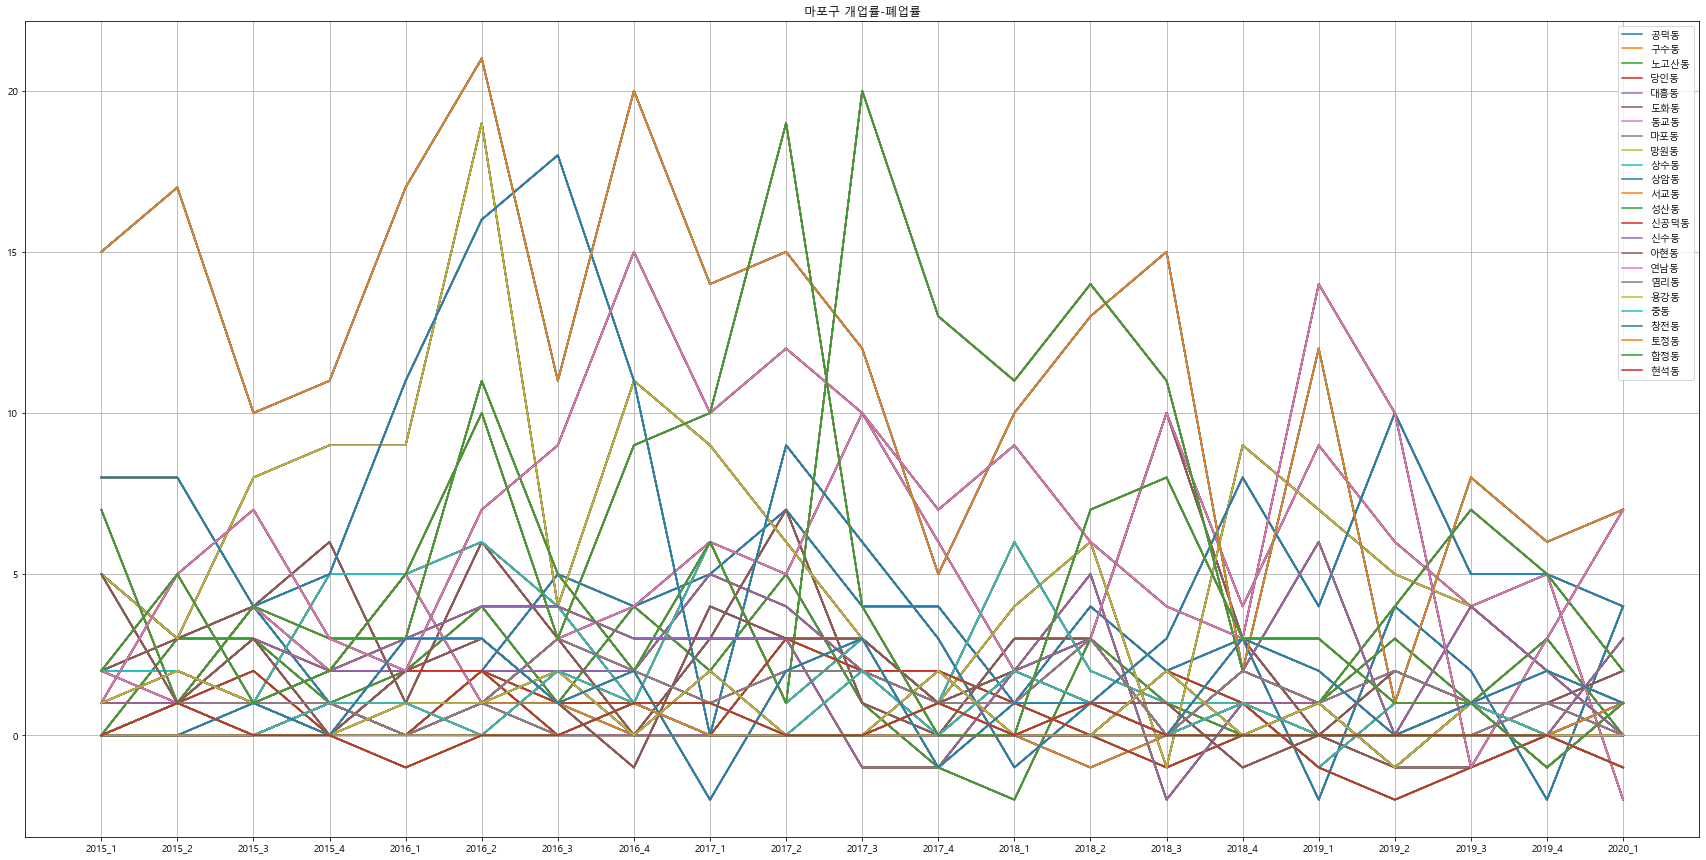

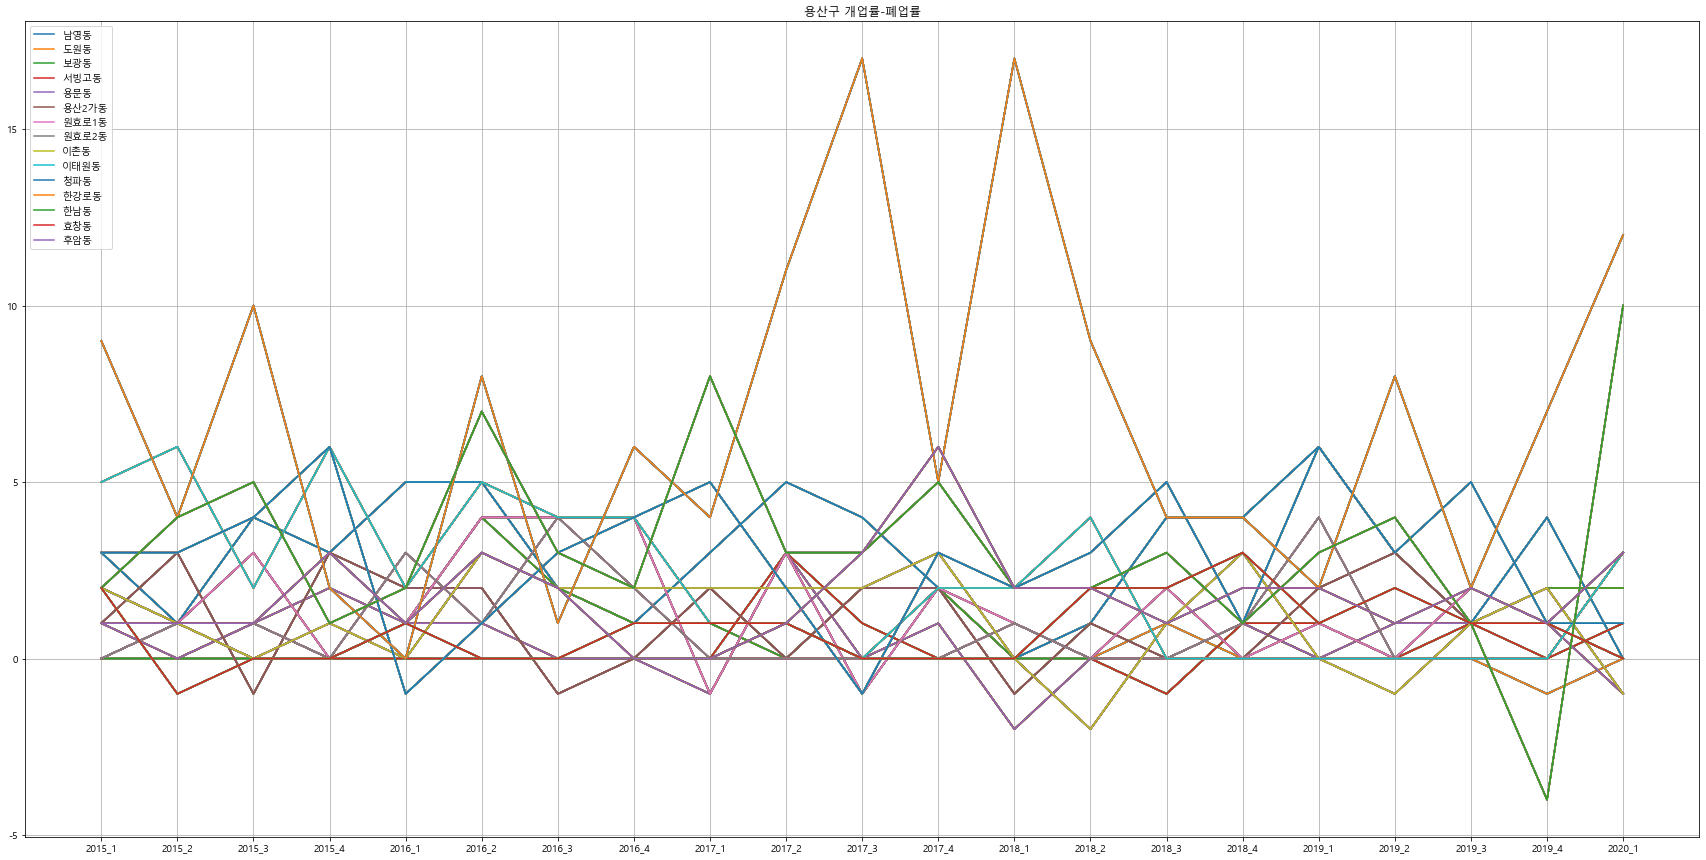

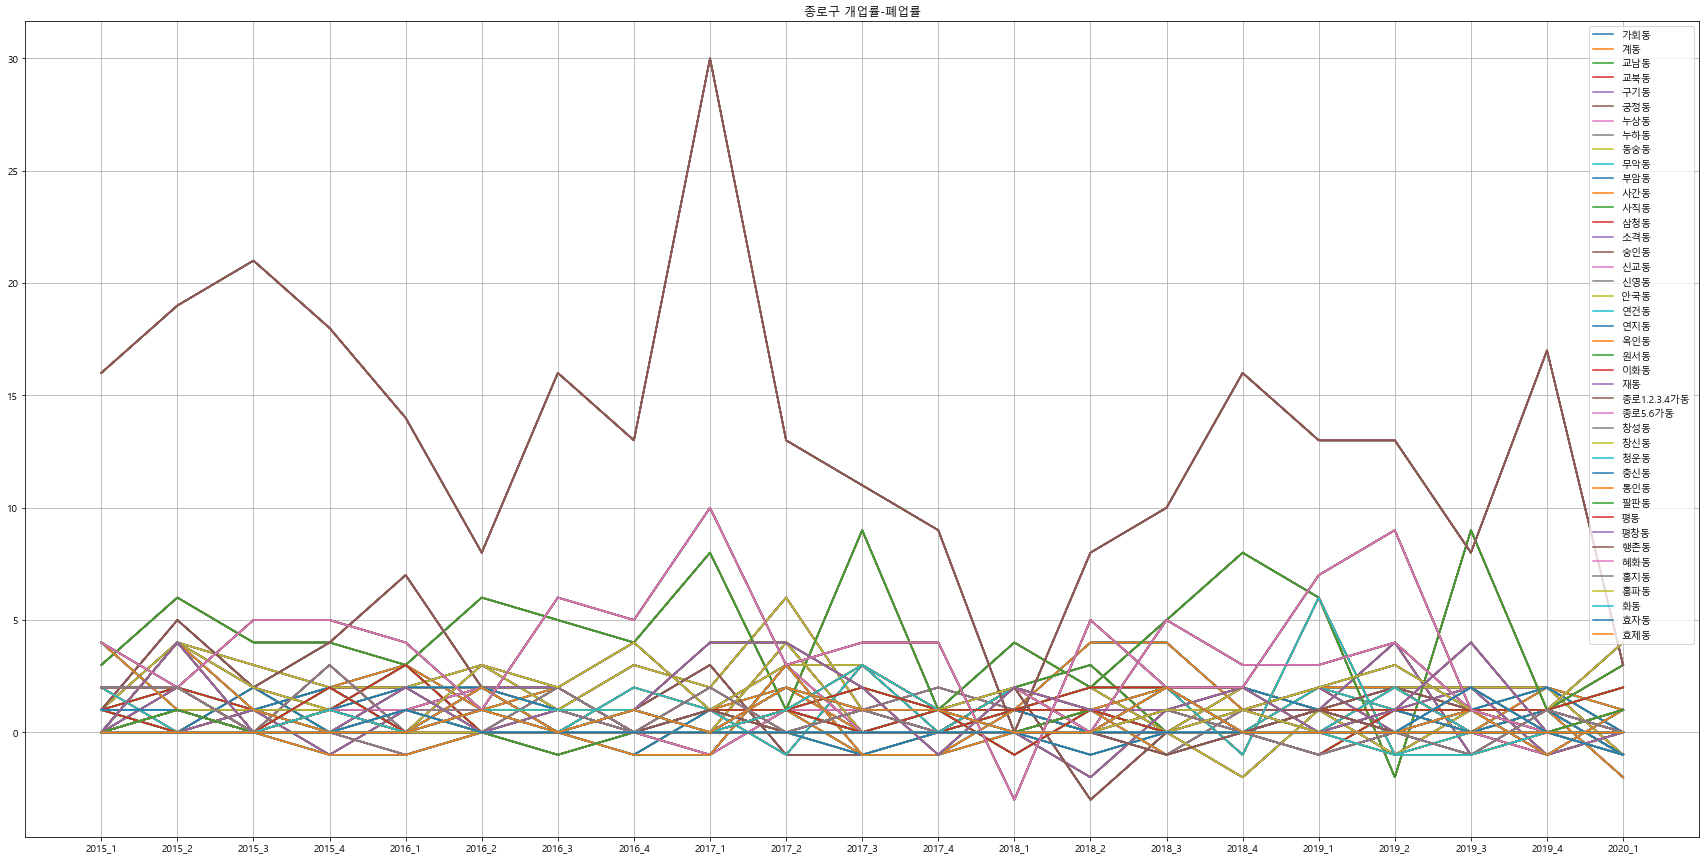

In [31]:
plt.figure(figsize=(30,15))
drawgraphgu('마포구')
drawgraphgu('용산구')
drawgraphgu('종로구')

# 연도별로 분석

# openrate_year

In [32]:
rest_data_openrate

,인허가일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,2017-03-16,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-03-20,종로구,평동,197039.322573,451838.986581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-03-23,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-03-23,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-03-23,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,2020-02-21,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,2020-02-20,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,2018-05-31,성동구,행당동,203523.983358,450749.018495,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,2016-02-12,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
rest_data_closedrate

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2017_4,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1
0,NaT,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaT,종로구,평동,197039.322573,451838.986581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaT,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaT,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,2020-03-06,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33967,2020-03-23,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33968,2018-06-21,성동구,행당동,203523.983358,450749.018495,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33969,NaT,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
rest_data_openrate['2015'] = rest_data_openrate['2015_1']+rest_data_openrate['2015_2']+rest_data_openrate['2015_3']+rest_data_openrate['2015_4']
rest_data_openrate['2016'] = rest_data_openrate['2016_1']+rest_data_openrate['2016_2']+rest_data_openrate['2016_3']+rest_data_openrate['2016_4']
rest_data_openrate['2017'] = rest_data_openrate['2017_1']+rest_data_openrate['2017_2']+rest_data_openrate['2017_3']+rest_data_openrate['2017_4']
rest_data_openrate['2018'] = rest_data_openrate['2018_1']+rest_data_openrate['2018_2']+rest_data_openrate['2018_3']+rest_data_openrate['2018_4']
rest_data_openrate['2019'] = rest_data_openrate['2019_1']+rest_data_openrate['2019_2']+rest_data_openrate['2019_3']+rest_data_openrate['2019_4']

In [35]:
rest_data_openrate_year = rest_data_openrate.copy()

In [36]:
rest_data_openrate_year.drop(['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1'], axis=1, inplace=True)
rest_data_openrate_year

,인허가일자,구,동,x,y,2015,2016,2017,2018,2019
0,2017-03-16,종로구,혜화동,199909.059357,453439.755923,0,0,1,0,0
1,2017-03-20,종로구,평동,197039.322573,451838.986581,0,0,1,0,0
2,2017-03-23,종로구,사직동,197889.897982,452238.323738,0,0,1,0,0
3,2017-03-23,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,1,0,0
4,2017-03-23,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
33966,2020-02-21,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0
33967,2020-02-20,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0
33968,2018-05-31,성동구,행당동,203523.983358,450749.018495,0,0,0,1,0
33969,2016-02-12,강남구,삼성동,205116.195218,445783.267094,0,1,0,0,0


In [38]:
rest_open_group_year = rest_data_openrate_year.groupby([rest_data_openrate_year.구,rest_data_openrate_year.동])[['2015','2016','2017','2018','2019']].sum()

In [39]:
rest_open_group_year_cnt = rest_data_openrate_year.groupby([rest_data_openrate.구,rest_data_openrate.동])['동'].count().to_frame()

In [40]:
rest_open_group_year_cnt = rest_open_group_year_cnt.rename(columns={'동':'count'})
rest_open_group_year_cnt

count
구   동         
강남구 개포동    117
    논현동    399
    대치동    511
    도곡동    153
    삼성동   1349
...        ...
중랑구 면목동    304
    묵동      94
    상봉동    128
    신내동     65
    중화동    102

[277 rows x 1 columns]

In [41]:
rest_open_group_year

2015  2016  2017  2018  2019
구   동                                
강남구 개포동    15    32    21    20    25
    논현동    61    83    81    70    91
    대치동    81   105    81   115   109
    도곡동    31    32    25    26    30
    삼성동   130   266   311   328   287
...       ...   ...   ...   ...   ...
중랑구 면목동    29    65    62    56    77
    묵동      7    15    18    25    27
    상봉동    19    24    26    22    31
    신내동     8    19     8    16    12
    중화동    10    26    13    24    23

[277 rows x 5 columns]

In [43]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = rest_open_group_year.index.tolist()
rowcnt2 = rest_open_group_year_cnt.index.tolist()

def calopenrate(i,j):
    for k in range(0,5):
        rest_open_group_year.iloc[i,k] = round(((rest_open_group_year.iloc[i,k]/rest_open_group_year_cnt.iloc[j,0])*100),2)

def vlookup():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate(i,j)
vlookup()

In [44]:
rest_open_group_rate_year = rest_open_group_year

In [45]:
stacked_openrate_year = rest_open_group_rate_year.stack().to_frame()
stacked_openrate_year = stacked_openrate_year.rename(columns={0:'openrate'})
stacked_openrate_year

openrate
구   동                 
강남구 개포동 2015     10.96
        2016     23.38
        2017     15.34
        2018     14.61
        2019     18.26
...                ...
중랑구 중화동 2015     10.00
        2016     26.00
        2017     13.00
        2018     24.00
        2019     23.00

[1385 rows x 1 columns]

# closedrate_year

In [46]:
rest_data_closedrate_year = rest_data_closedrate.copy()
rest_data_closedrate_year['2015'] = rest_data_closedrate_year['2015_1']+rest_data_closedrate_year['2015_2']+rest_data_closedrate_year['2015_3']+rest_data_closedrate_year['2015_4']
rest_data_closedrate_year['2016'] = rest_data_closedrate_year['2016_1']+rest_data_closedrate_year['2016_2']+rest_data_closedrate_year['2016_3']+rest_data_closedrate_year['2016_4']
rest_data_closedrate_year['2017'] = rest_data_closedrate_year['2017_1']+rest_data_closedrate_year['2017_2']+rest_data_closedrate_year['2017_3']+rest_data_closedrate_year['2017_4']
rest_data_closedrate_year['2018'] = rest_data_closedrate_year['2018_1']+rest_data_closedrate_year['2018_2']+rest_data_closedrate_year['2018_3']+rest_data_closedrate_year['2018_4']
rest_data_closedrate_year['2019'] = rest_data_closedrate_year['2019_1']+rest_data_closedrate_year['2019_2']+rest_data_closedrate_year['2019_3']+rest_data_closedrate_year['2019_4']

In [47]:
rest_data_closedrate_year

,폐업일자,구,동,x,y,2015_1,2015_2,2015_3,2015_4,2016_1,...,2019_1,2019_2,2019_3,2019_4,2020_1,2015,2016,2017,2018,2019
0,NaT,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaT,종로구,평동,197039.322573,451838.986581,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaT,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaT,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33966,2020-03-06,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33967,2020-03-23,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33968,2018-06-21,성동구,행당동,203523.983358,450749.018495,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33969,NaT,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
rest_data_closedrate_year.drop(['2015_1','2015_2','2015_3','2015_4','2016_1','2016_2','2016_3','2016_4','2017_1','2017_2','2017_3','2017_4','2018_1','2018_2','2018_3','2018_4','2019_1','2019_2','2019_3','2019_4','2020_1'], axis=1, inplace=True)
rest_data_closedrate_year

,폐업일자,구,동,x,y,2015,2016,2017,2018,2019
0,NaT,종로구,혜화동,199909.059357,453439.755923,0,0,0,0,0
1,NaT,종로구,평동,197039.322573,451838.986581,0,0,0,0,0
2,NaT,종로구,사직동,197889.897982,452238.323738,0,0,0,0,0
3,NaT,종로구,종로1.2.3.4가동,198332.884663,451862.244367,0,0,0,0,0
4,NaT,종로구,종로1.2.3.4가동,198620.301187,451950.125134,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
33966,2020-03-06,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0
33967,2020-03-23,강동구,천호동,210929.919694,448537.406728,0,0,0,0,0
33968,2018-06-21,성동구,행당동,203523.983358,450749.018495,0,0,0,1,0
33969,NaT,강남구,삼성동,205116.195218,445783.267094,0,0,0,0,0


In [50]:
rest_closed_group_year = rest_data_closedrate_year.groupby([rest_data_closedrate_year.구,rest_data_closedrate_year.동])[['2015','2016','2017','2018','2019']].sum()

In [51]:
rest_closed_group_year_cnt = rest_data_closedrate_year.groupby([rest_data_closedrate_year.구,rest_data_closedrate_year.동])['동'].count().to_frame()

In [52]:
rest_closed_group_year_cnt = rest_closed_group_year_cnt.rename(columns={'동':'count'})
rest_closed_group_year_cnt

count
구   동         
강남구 개포동    117
    논현동    399
    대치동    511
    도곡동    153
    삼성동   1349
...        ...
중랑구 면목동    304
    묵동      94
    상봉동    128
    신내동     65
    중화동    102

[277 rows x 1 columns]

In [53]:
rest_closed_group_year

2015  2016  2017  2018  2019
구   동                                
강남구 개포동     1     5     6     7    14
    논현동     5    23    29    31    47
    대치동    11    18    33    51    71
    도곡동     6    12    10    10    12
    삼성동    55   189   258   294   255
...       ...   ...   ...   ...   ...
중랑구 면목동     0    10    31    22    31
    묵동      1     3     1     5    12
    상봉동     2     8     5     5    14
    신내동     1     0     2     6     3
    중화동     1     3     5     9     3

[277 rows x 5 columns]

In [55]:
# for문 2개 필요 (아래로 내려가는 for, 옆으로 가는 for)
# normal_open_group 인덱스값이 normal_open_group_cnt 인덱스값과 일치하면 해당 행의 값을 돌면서 개업률을 계산한다.
rowcnt1 = rest_closed_group_year.index.tolist()
rowcnt2 = rest_closed_group_year_cnt.index.tolist()

def calopenrate_closed(i,j):
    for k in range(0,5):
        rest_closed_group_year.iloc[i,k] = round(((rest_closed_group_year.iloc[i,k]/rest_closed_group_year_cnt.iloc[j,0])*100),2)

def vlookup_closed():
    for i in range(0,len(rowcnt1)):
        for j in range(0,len(rowcnt2)):
            if (rowcnt1[i][1] == rowcnt2[j][1]):
                return calopenrate_closed(i,j)
vlookup_closed()
rest_closed_group_year

2015    2016    2017    2018    2019
구   동                                         
강남구 개포동   0.73    3.65    4.38    5.11   10.23
    논현동   5.00   23.00   29.00   31.00   47.00
    대치동  11.00   18.00   33.00   51.00   71.00
    도곡동   6.00   12.00   10.00   10.00   12.00
    삼성동  55.00  189.00  258.00  294.00  255.00
...        ...     ...     ...     ...     ...
중랑구 면목동   0.00   10.00   31.00   22.00   31.00
    묵동    1.00    3.00    1.00    5.00   12.00
    상봉동   2.00    8.00    5.00    5.00   14.00
    신내동   1.00    0.00    2.00    6.00    3.00
    중화동   1.00    3.00    5.00    9.00    3.00

[277 rows x 5 columns]

In [56]:
rest_closed_group_rate_year = rest_closed_group_year

In [57]:
stacked_closedrate_year = rest_closed_group_rate_year.stack().to_frame()
stacked_closedrate_year = stacked_closedrate_year.rename(columns={0:'closedrate'})
stacked_closedrate_year

closedrate
구   동                   
강남구 개포동 2015        0.73
        2016        3.65
        2017        4.38
        2018        5.11
        2019       10.23
...                  ...
중랑구 중화동 2015        1.00
        2016        3.00
        2017        5.00
        2018        9.00
        2019        3.00

[1385 rows x 1 columns]

# 합치기

In [58]:
stacked_openrate_year.index.names = ['gu','dong','year_quarter']
stacked_closedrate_year.index.names = ['gu','dong','year_quarter']

In [59]:
stacked_openrate_year

openrate
gu  dong year_quarter          
강남구 개포동  2015             10.96
         2016             23.38
         2017             15.34
         2018             14.61
         2019             18.26
...                         ...
중랑구 중화동  2015             10.00
         2016             26.00
         2017             13.00
         2018             24.00
         2019             23.00

[1385 rows x 1 columns]

In [60]:
stacked_closedrate_year

closedrate
gu  dong year_quarter            
강남구 개포동  2015                0.73
         2016                3.65
         2017                4.38
         2018                5.11
         2019               10.23
...                           ...
중랑구 중화동  2015                1.00
         2016                3.00
         2017                5.00
         2018                9.00
         2019                3.00

[1385 rows x 1 columns]

In [61]:
rest_OpenByClosed_year = pd.merge(stacked_openrate_year, stacked_closedrate_year, on=['gu','dong','year_quarter'])

In [62]:
rest_OpenByClosed_year['diff'] = rest_OpenByClosed_year['openrate']-rest_OpenByClosed_year['closedrate']
rest_OpenByClosed_year.drop(['openrate','closedrate'],axis=1,inplace=True)

In [63]:
rest_OpenByClosed_year

diff
gu  dong year_quarter       
강남구 개포동  2015          10.23
         2016          19.73
         2017          10.96
         2018           9.50
         2019           8.03
...                      ...
중랑구 중화동  2015           9.00
         2016          23.00
         2017           8.00
         2018          15.00
         2019          20.00

[1385 rows x 1 columns]

# 시각화_year

In [64]:
def uniquedong_year(gu):
    b = rest_OpenByClosed_year.index.tolist()
    c = [b[0][1]]
    index = 0
    d = b[0][1]
    for j in b:
        if j[0]==gu:
            if d==j[1]:
                continue
            else:
                d = j[1]
                c.append(j[1])
            index = b.index(j)
        else:
            continue
    c.pop(0)        
    return (c)

def drawgraphgu_year(gu):
    a = rest_OpenByClosed_year.index.tolist()
    plt.figure(figsize=(30,15))
    for i in a:
        if (i[0]==gu):
            data = rest_OpenByClosed_year.loc[i[0],i[1]]
            plt.plot(data.index, data.values)
        else:
            continue
    plt.title(gu+" 개업률-폐업률")
    plt.legend(uniquedong_year(gu))
    plt.grid()
    plt.show()

<Figure size 2160x1080 with 0 Axes>

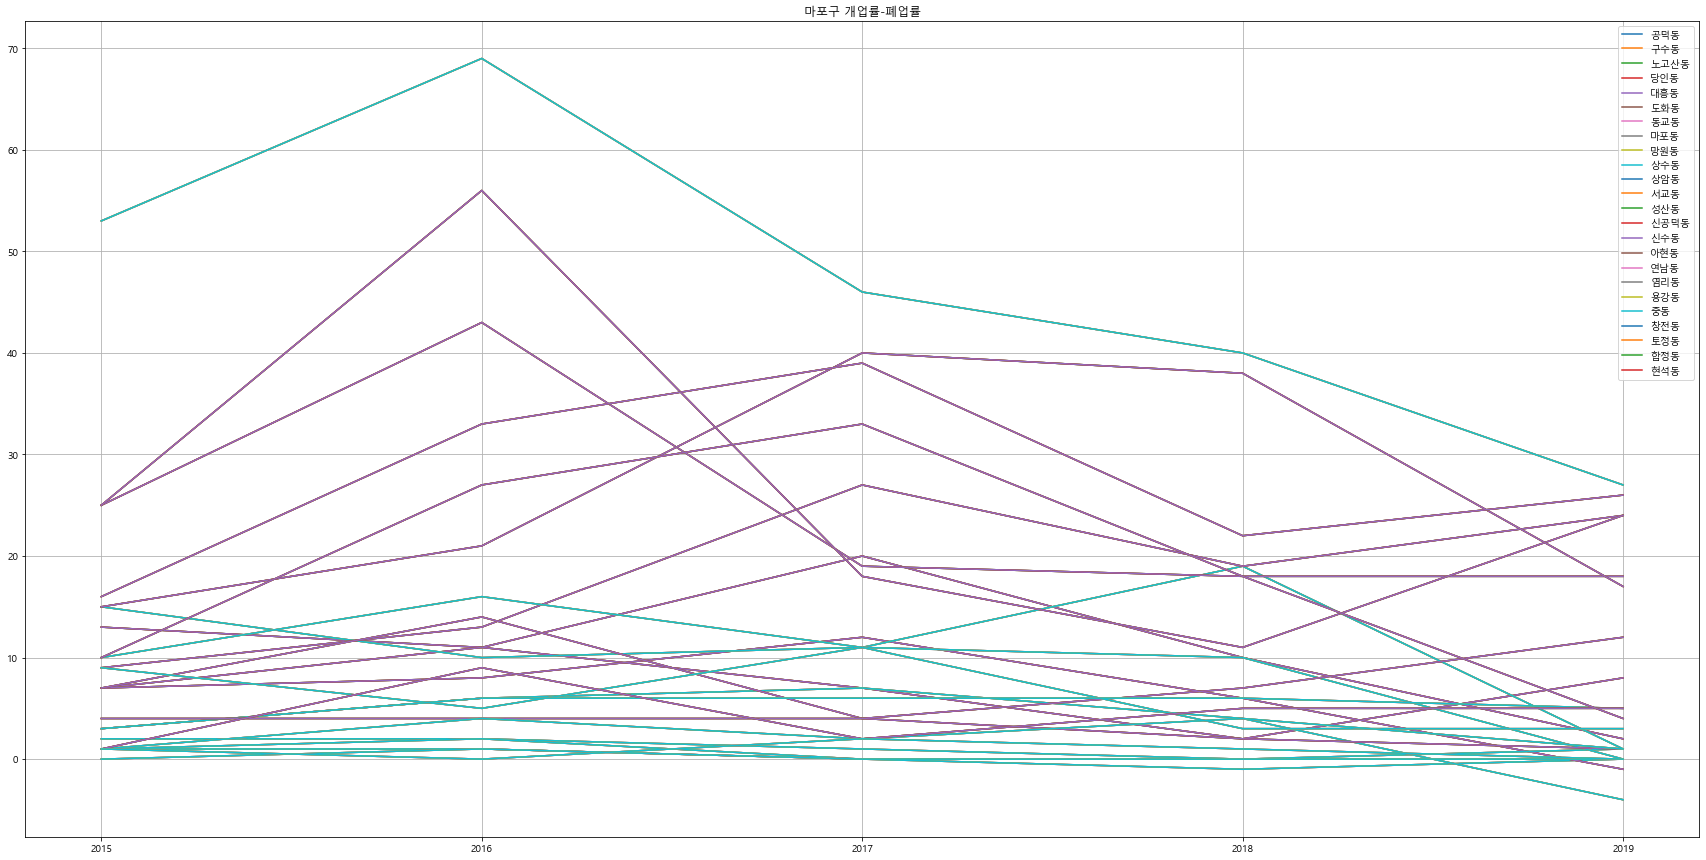

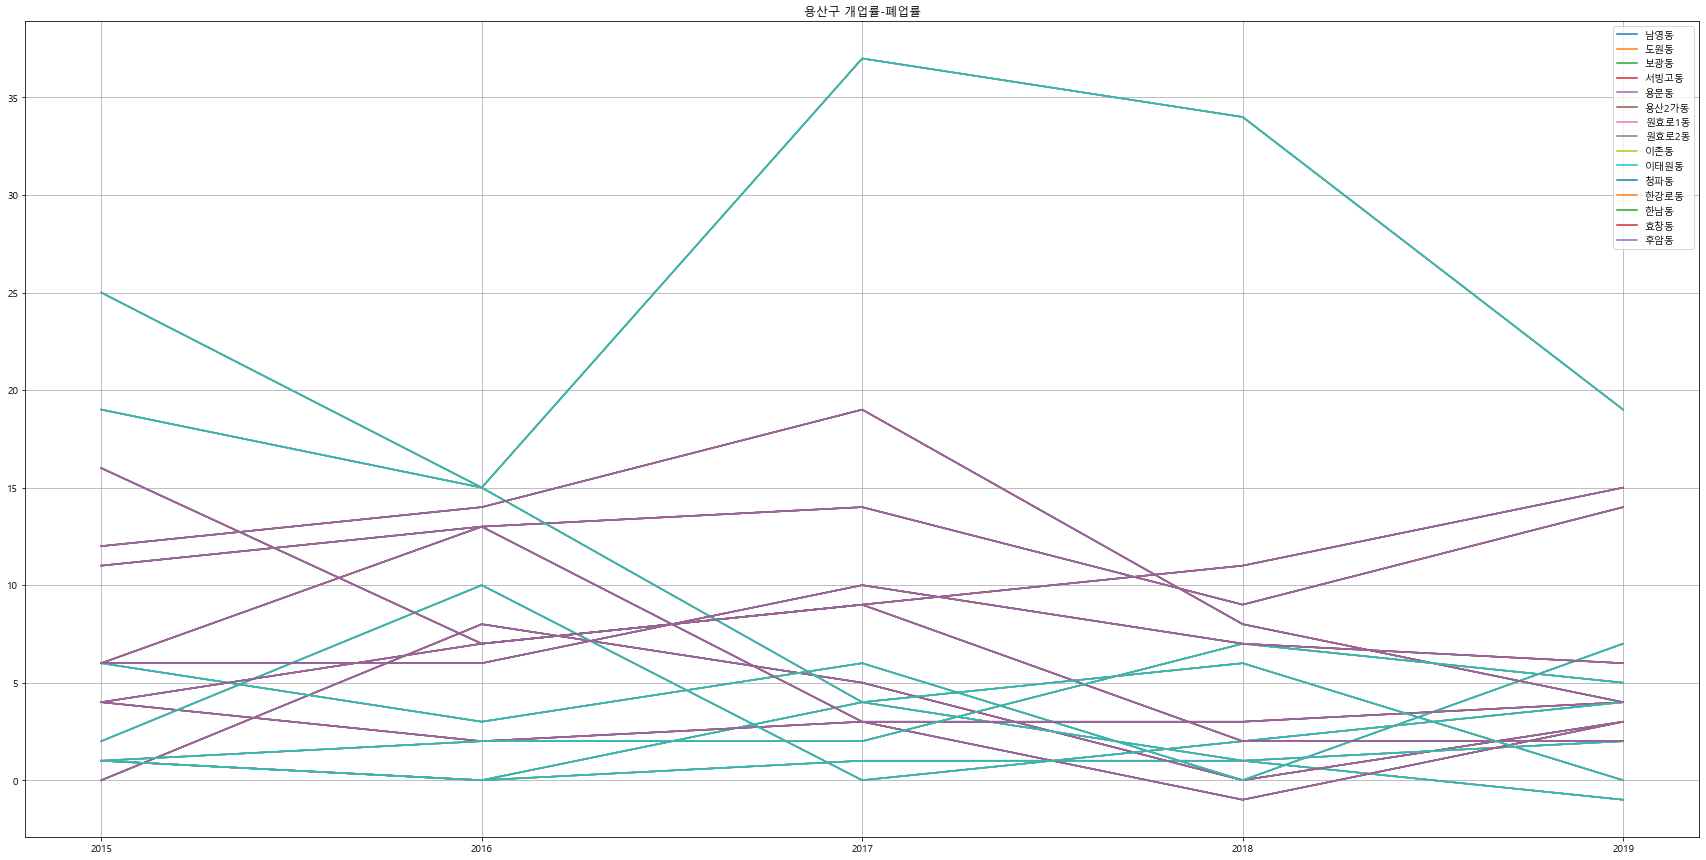

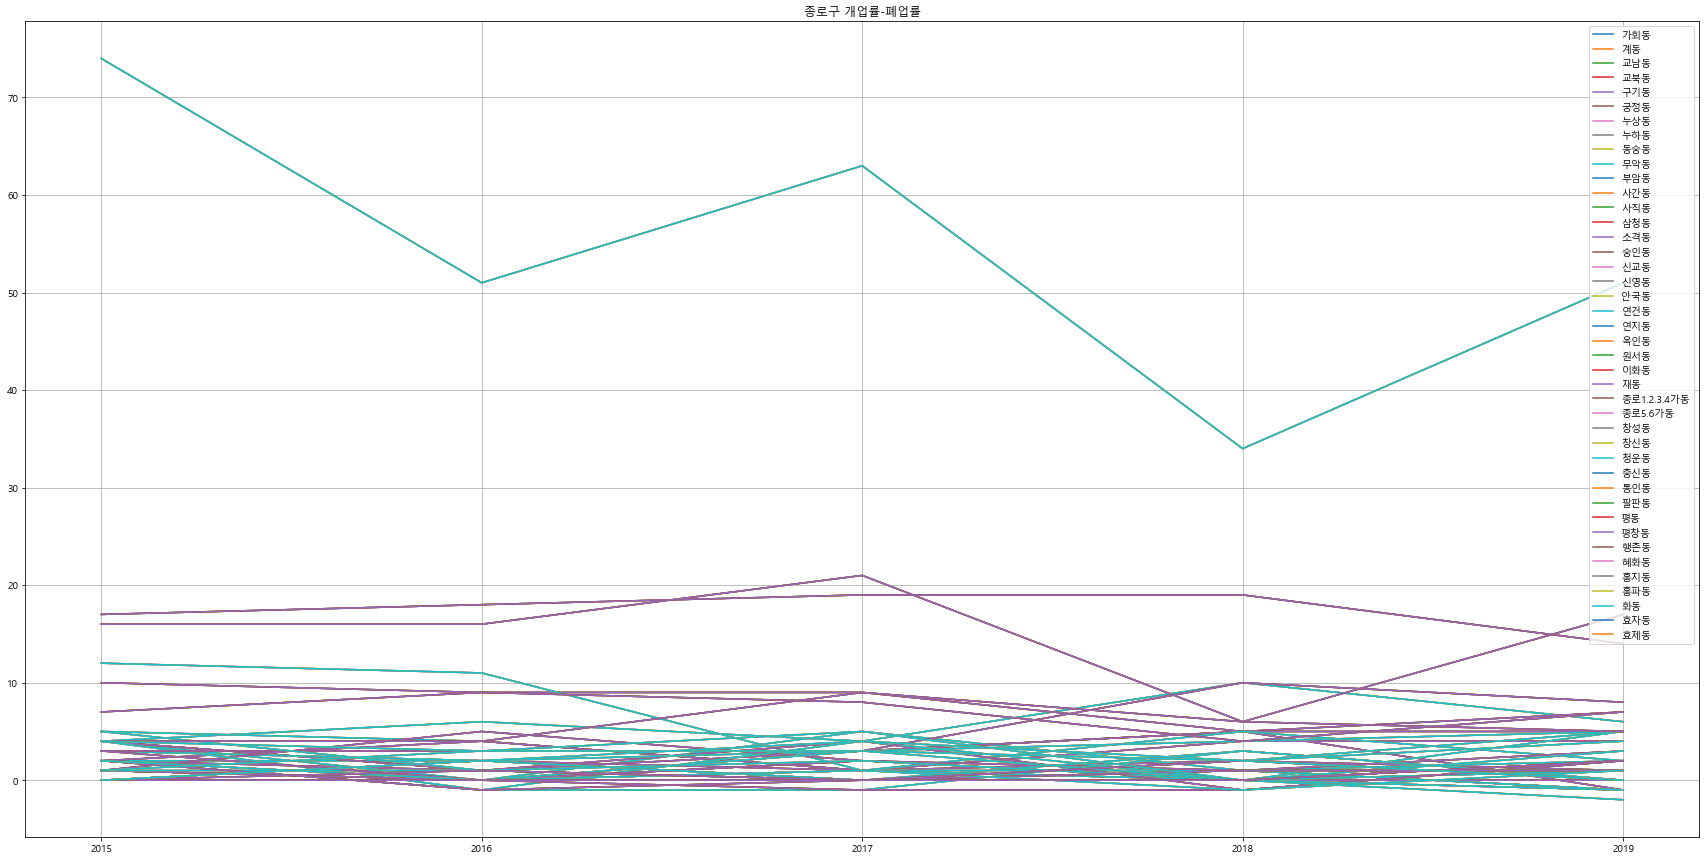

In [65]:
plt.figure(figsize=(30,15))
drawgraphgu_year('마포구')
drawgraphgu_year('용산구')
drawgraphgu_year('종로구')

# 용산구, 마포구, 종로구 데이터만 뜯어보기

In [66]:
rest_closed_group_year

2015    2016    2017    2018    2019
구   동                                         
강남구 개포동   0.73    3.65    4.38    5.11   10.23
    논현동   5.00   23.00   29.00   31.00   47.00
    대치동  11.00   18.00   33.00   51.00   71.00
    도곡동   6.00   12.00   10.00   10.00   12.00
    삼성동  55.00  189.00  258.00  294.00  255.00
...        ...     ...     ...     ...     ...
중랑구 면목동   0.00   10.00   31.00   22.00   31.00
    묵동    1.00    3.00    1.00    5.00   12.00
    상봉동   2.00    8.00    5.00    5.00   14.00
    신내동   1.00    0.00    2.00    6.00    3.00
    중화동   1.00    3.00    5.00    9.00    3.00

[277 rows x 5 columns]

In [67]:
rest_open_group_year

2015    2016    2017    2018    2019
구   동                                          
강남구 개포동   10.96   23.38   15.34   14.61   18.26
    논현동   61.00   83.00   81.00   70.00   91.00
    대치동   81.00  105.00   81.00  115.00  109.00
    도곡동   31.00   32.00   25.00   26.00   30.00
    삼성동  130.00  266.00  311.00  328.00  287.00
...         ...     ...     ...     ...     ...
중랑구 면목동   29.00   65.00   62.00   56.00   77.00
    묵동     7.00   15.00   18.00   25.00   27.00
    상봉동   19.00   24.00   26.00   22.00   31.00
    신내동    8.00   19.00    8.00   16.00   12.00
    중화동   10.00   26.00   13.00   24.00   23.00

[277 rows x 5 columns]

In [68]:
df1 = rest_open_group_year.reset_index()
df1

,구,동,2015,2016,2017,2018,2019
0,강남구,개포동,10.96,23.38,15.34,14.61,18.26
1,강남구,논현동,61.00,83.00,81.00,70.00,91.00
2,강남구,대치동,81.00,105.00,81.00,115.00,109.00
3,강남구,도곡동,31.00,32.00,25.00,26.00,30.00
4,강남구,삼성동,130.00,266.00,311.00,328.00,287.00
...,...,...,...,...,...,...,...
272,중랑구,면목동,29.00,65.00,62.00,56.00,77.00
273,중랑구,묵동,7.00,15.00,18.00,25.00,27.00
274,중랑구,상봉동,19.00,24.00,26.00,22.00,31.00
275,중랑구,신내동,8.00,19.00,8.00,16.00,12.00


In [69]:
df2 = rest_closed_group_year.reset_index()
df2

,구,동,2015,2016,2017,2018,2019
0,강남구,개포동,0.73,3.65,4.38,5.11,10.23
1,강남구,논현동,5.00,23.00,29.00,31.00,47.00
2,강남구,대치동,11.00,18.00,33.00,51.00,71.00
3,강남구,도곡동,6.00,12.00,10.00,10.00,12.00
4,강남구,삼성동,55.00,189.00,258.00,294.00,255.00
...,...,...,...,...,...,...,...
272,중랑구,면목동,0.00,10.00,31.00,22.00,31.00
273,중랑구,묵동,1.00,3.00,1.00,5.00,12.00
274,중랑구,상봉동,2.00,8.00,5.00,5.00,14.00
275,중랑구,신내동,1.00,0.00,2.00,6.00,3.00


In [70]:
df3 = df2.copy()
df3['2015'] = df1['2015']-df2['2015']
df3['2016'] = df1['2016']-df2['2016']
df3['2017'] = df1['2017']-df2['2017']
df3['2018'] = df1['2018']-df2['2018']
df3['2019'] = df1['2019']-df2['2019']
df3

,구,동,2015,2016,2017,2018,2019
0,강남구,개포동,10.23,19.73,10.96,9.5,8.03
1,강남구,논현동,56.00,60.00,52.00,39.0,44.00
2,강남구,대치동,70.00,87.00,48.00,64.0,38.00
3,강남구,도곡동,25.00,20.00,15.00,16.0,18.00
4,강남구,삼성동,75.00,77.00,53.00,34.0,32.00
...,...,...,...,...,...,...,...
272,중랑구,면목동,29.00,55.00,31.00,34.0,46.00
273,중랑구,묵동,6.00,12.00,17.00,20.0,15.00
274,중랑구,상봉동,17.00,16.00,21.00,17.0,17.00
275,중랑구,신내동,7.00,19.00,6.00,10.0,9.00


In [71]:
yongsan = df3[df3['구']=='용산구']
mapo = df3[df3['구']=='마포구']
jongro = df3[df3['구']=='종로구']

In [72]:
yongsan.drop(['구'], axis=1,inplace=True)

C:\Users\dpffp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
yongsan.set_index('동')

,2015,2016,2017,2018,2019
동,,,,,
남영동,11.0,13.0,14.0,9.0,14.0
도원동,1.0,0.0,1.0,1.0,-1.0
보광동,0.0,8.0,5.0,0.0,3.0
서빙고동,1.0,0.0,4.0,1.0,2.0
용문동,4.0,2.0,3.0,-1.0,3.0
용산2가동,6.0,3.0,6.0,0.0,7.0
원효로1동,6.0,13.0,3.0,3.0,4.0
원효로2동,2.0,10.0,0.0,2.0,4.0
이촌동,4.0,7.0,9.0,2.0,2.0


In [ ]:
yongsan = yongsan.reset_index(drop=True)

In [74]:
mapo

,구,동,2015,2016,2017,2018,2019
89,마포구,공덕동,13.0,11.0,20.0,10.0,2.0
90,마포구,구수동,2.0,2.0,1.0,0.0,0.0
91,마포구,노고산동,7.0,11.0,7.0,2.0,8.0
92,마포구,당인동,1.0,2.0,0.0,-1.0,0.0
93,마포구,대흥동,7.0,8.0,12.0,6.0,-1.0
94,마포구,도화동,15.0,10.0,11.0,19.0,1.0
95,마포구,동교동,9.0,13.0,27.0,19.0,24.0
96,마포구,마포동,1.0,1.0,0.0,0.0,1.0
97,마포구,망원동,25.0,43.0,19.0,18.0,18.0
98,마포구,상수동,10.0,16.0,11.0,10.0,0.0


In [75]:
mapo.drop(['구'], axis=1,inplace=True)

C:\Users\dpffp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
mapo = mapo.reset_index(drop=True)

In [80]:
jongro

,동,2015,2016,2017,2018,2019
0,가회동,2.0,0.0,1.0,2.0,1.0
1,계동,4.0,6.0,4.0,10.0,6.0
2,교남동,1.0,0.0,3.0,5.0,-1.0
3,교북동,0.0,0.0,0.0,3.0,0.0
4,구기동,0.0,2.0,1.0,4.0,4.0
5,궁정동,0.0,0.0,0.0,0.0,1.0
6,누상동,2.0,1.0,0.0,1.0,-1.0
7,누하동,4.0,0.0,5.0,1.0,1.0
8,동숭동,10.0,9.0,9.0,5.0,7.0
9,무악동,2.0,2.0,0.0,2.0,5.0


In [78]:
jongro.drop(['구'], axis=1,inplace=True)

C:\Users\dpffp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
jongro = jongro.reset_index(drop=True)

# 표준편차가 전체 표준편차의 평균보다 큰 값만을 표현
우리는 상권이 5년 내내 번영하는 곳을 보고 싶은 것도 아니고, 애초에 상권이 발달하지 않은 지역을 보고자 하는 것도 아님. 개업률-폐업률이 변동성이 있는 곳을 보고 싶은 것이므로 전체의 표준편차(변동성 지표)보다 큰 값만을 그래프에 표현한다.

#용산구

In [108]:
yongsan_sd = yongsan.std(axis=1)

In [109]:
yongsan_sd_mean = yongsan_sd.mean()

In [110]:
yongsan_sd_mean

3.6760822453020467

In [111]:
yongsan_sd

0     2.167948
1     0.894427
2     3.420526
3     1.516575
4     1.923538
5     2.880972
6     4.207137
7     3.847077
8     3.114482
9     7.918333
10    3.847077
11    9.433981
12    5.727128
13    2.509980
14    1.732051
dtype: float64

In [112]:
yongsan['sd'] = yongsan_sd
yongsan

,동,2015,2016,2017,2018,2019,sd
0,남영동,11.0,13.0,14.0,9.0,14.0,2.167948
1,도원동,1.0,0.0,1.0,1.0,-1.0,0.894427
2,보광동,0.0,8.0,5.0,0.0,3.0,3.420526
3,서빙고동,1.0,0.0,4.0,1.0,2.0,1.516575
4,용문동,4.0,2.0,3.0,-1.0,3.0,1.923538
5,용산2가동,6.0,3.0,6.0,0.0,7.0,2.880972
6,원효로1동,6.0,13.0,3.0,3.0,4.0,4.207137
7,원효로2동,2.0,10.0,0.0,2.0,4.0,3.847077
8,이촌동,4.0,7.0,9.0,2.0,2.0,3.114482
9,이태원동,19.0,15.0,4.0,6.0,0.0,7.918333


In [113]:
yongsan_sdfiltered = yongsan[yongsan['sd']>=yongsan_sd_mean].sort_values(['sd'],ascending=False)

In [114]:
yongsan_sdfiltered

,동,2015,2016,2017,2018,2019,sd
11,한강로동,25.0,15.0,37.0,34.0,19.0,9.433981
9,이태원동,19.0,15.0,4.0,6.0,0.0,7.918333
12,한남동,12.0,14.0,19.0,8.0,4.0,5.727128
6,원효로1동,6.0,13.0,3.0,3.0,4.0,4.207137
7,원효로2동,2.0,10.0,0.0,2.0,4.0,3.847077
10,청파동,16.0,7.0,9.0,11.0,15.0,3.847077


In [ ]:
yongsan_growthrate = [((yongsan_sdfiltered['2019']-yongsan_sdfiltered['2015'])/yongsan_sdfiltered['2015'])*100]
yongsan_growthrate
# 2020-1분기는 제외하는 게 맞음 (혼자 분기별 데이터이기 때문에 비교할 수 없음)
# 한강로동, 이태원동, 한남동이 2015년도부터 2020년도까지 지속적으로 쇠퇴하고 있고 2019년과 2015년을 비교했을 때 그나마 유의미한 증가율을 보여줬던 동은 남영동(27%)이다. 청파동도 증가세이다.
# 하지만 한강로동, 이태원동, 한남동의 감소세에 비해 남영동, 청파동의 증가세가 드라마틱하지 않음
# 다른 지표들에서도 한강로, 이태원, 한남동이 감소하고 청파동, 남영동이 증가하는지 보고 젠트리피케이션 현상인지 정의해야 함
# 지도에는 한강로, 이태원, 한남동 - 감소 / 청파동, 남영동 - 증가 이렇게 하면 될듯?

In [115]:
yongsan_growthdirection = pd.DataFrame({'동':yongsan_sdfiltered['동'],  
                                        '15-16':((yongsan_sdfiltered['2016']-yongsan_sdfiltered['2015'])/yongsan_sdfiltered['2015'])*100,  
                                        '16-17':((yongsan_sdfiltered['2017']-yongsan_sdfiltered['2016'])/yongsan_sdfiltered['2016'])*100,  
                                       '17-18':((yongsan_sdfiltered['2018']-yongsan_sdfiltered['2017'])/yongsan_sdfiltered['2017'])*100,  
                                       '18-19':((yongsan_sdfiltered['2019']-yongsan_sdfiltered['2018'])/yongsan_sdfiltered['2018'])*100})
yongsan_growthdirection

,동,15-16,16-17,17-18,18-19
11,한강로동,-40.000000,146.666667,-8.108108,-44.117647
9,이태원동,-21.052632,-73.333333,50.000000,-100.000000
12,한남동,16.666667,35.714286,-57.894737,-50.000000
6,원효로1동,116.666667,-76.923077,0.000000,33.333333
7,원효로2동,400.000000,-100.000000,inf,100.000000
10,청파동,-56.250000,28.571429,22.222222,36.363636


#마포구

In [ ]:
mapo

In [ ]:
mapo_sd = mapo.std(axis=1)
mapo_sd_mean = mapo_sd.mean()

In [ ]:
mapo_sd

In [ ]:
mapo_sd_mean

In [ ]:
mapo['sd'] = mapo_sd

In [ ]:
mapo_sdfiltered = mapo[mapo['sd']>=mapo_sd_mean].sort_values(['sd'],ascending=False)
mapo_sdfiltered

In [ ]:
mapo_growthrate = [((mapo_sdfiltered['2019']-mapo_sdfiltered['2015'])/mapo_sdfiltered['2015'])*100]
mapo_growthrate

In [ ]:
mapo_growthdirection = pd.DataFrame({'동':mapo_sdfiltered['동'],  
                                        '15-16':((mapo_sdfiltered['2016']-mapo_sdfiltered['2015'])/mapo_sdfiltered['2015'])*100,  
                                        '16-17':((mapo_sdfiltered['2017']-mapo_sdfiltered['2016'])/mapo_sdfiltered['2016'])*100,  
                                       '17-18':((mapo_sdfiltered['2018']-mapo_sdfiltered['2017'])/mapo_sdfiltered['2017'])*100,  
                                       '18-19':((mapo_sdfiltered['2019']-mapo_sdfiltered['2018'])/mapo_sdfiltered['2018'])*100})
mapo_growthdirection

#종로구

In [ ]:
jongro

In [ ]:
jongro_sd = jongro.std(axis=1)
jongro_sd_mean = jongro_sd.mean()

In [ ]:
jongro['sd'] = jongro_sd

In [ ]:
jongro_sdfiltered = jongro[jongro['sd']>=jongro_sd_mean].sort_values('sd',ascending=False)
jongro_sdfiltered

In [ ]:
jongro_growthdirection = pd.DataFrame({'동':jongro_sdfiltered['동'],  
                                        '15-16':((jongro_sdfiltered['2016']-jongro_sdfiltered['2015'])/jongro_sdfiltered['2015'])*100,  
                                        '16-17':((jongro_sdfiltered['2017']-jongro_sdfiltered['2016'])/jongro_sdfiltered['2016'])*100,  
                                       '17-18':((jongro_sdfiltered['2018']-jongro_sdfiltered['2017'])/jongro_sdfiltered['2017'])*100,  
                                       '18-19':((jongro_sdfiltered['2019']-jongro_sdfiltered['2018'])/jongro_sdfiltered['2018'])*100})

jongro_growthdirection

# 용산구, 마포구, 종로구 filtered - 그래프 그리기

In [117]:
def drawFilteredDF(df):
    a1 = df.set_index('동').drop('sd', axis=1,inplace=False).transpose()
    plt.figure(figsize=(15,6))
    plt.plot(a1)
    plt.legend(a1.columns.tolist())
    plt.show()

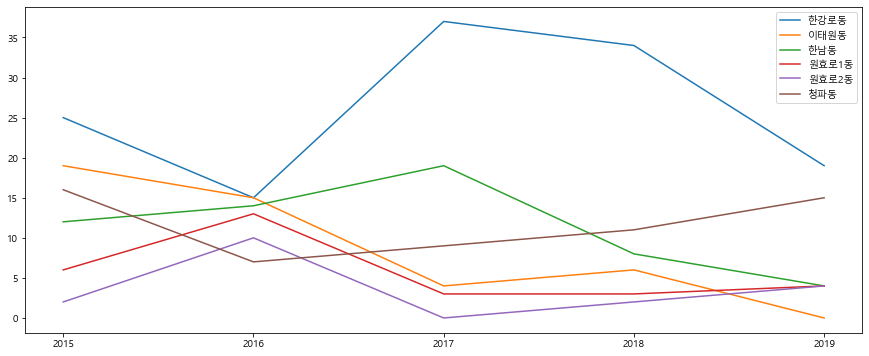

In [119]:
#drawFilteredDF(jongro_sdfiltered)
#drawFilteredDF(mapo_sdfiltered)
drawFilteredDF(yongsan_sdfiltered)

# 상위값과 하위값 뽑아서 점 지도로 그리기(year)

In [ ]:
rest_closed_group_year

In [ ]:
rest_open_group_year

In [ ]:
df1 = rest_open_group_year.reset_index()
df1

In [ ]:
df2 = rest_closed_group_year.reset_index()
df2

In [ ]:
df3 = df2.copy()
df3['2015'] = df1['2015']-df2['2015']
df3['2016'] = df1['2016']-df2['2016']
df3['2017'] = df1['2017']-df2['2017']
df3['2018'] = df1['2018']-df2['2018']
df3['2019'] = df1['2019']-df2['2019']
df3['2020(1분기)'] = df1['2020(1분기)']-df2['2020(1분기)']
df3

In [ ]:
yongsan = df3[df3['구']=='용산구']
mapo = df3[df3['구']=='마포구']
jongro = df3[df3['구']=='종로구']

In [ ]:
# yongsan.drop(['구'], axis=1,inplace=True)

In [87]:
yongsan.set_index('동')

,2015,2016,2017,2018,2019
동,,,,,
남영동,11.0,13.0,14.0,9.0,14.0
도원동,1.0,0.0,1.0,1.0,-1.0
보광동,0.0,8.0,5.0,0.0,3.0
서빙고동,1.0,0.0,4.0,1.0,2.0
용문동,4.0,2.0,3.0,-1.0,3.0
용산2가동,6.0,3.0,6.0,0.0,7.0
원효로1동,6.0,13.0,3.0,3.0,4.0
원효로2동,2.0,10.0,0.0,2.0,4.0
이촌동,4.0,7.0,9.0,2.0,2.0


In [90]:
yongsan = yongsan.reset_index(drop=True)

In [91]:
yongsan

,동,2015,2016,2017,2018,2019
0,남영동,11.0,13.0,14.0,9.0,14.0
1,도원동,1.0,0.0,1.0,1.0,-1.0
2,보광동,0.0,8.0,5.0,0.0,3.0
3,서빙고동,1.0,0.0,4.0,1.0,2.0
4,용문동,4.0,2.0,3.0,-1.0,3.0
5,용산2가동,6.0,3.0,6.0,0.0,7.0
6,원효로1동,6.0,13.0,3.0,3.0,4.0
7,원효로2동,2.0,10.0,0.0,2.0,4.0
8,이촌동,4.0,7.0,9.0,2.0,2.0
9,이태원동,19.0,15.0,4.0,6.0,0.0


In [95]:
year = [2015,2016,2017,2018,2019]
max_dong = [yongsan.iloc[int(yongsan['2015'].idxmax()),0],  
       yongsan.iloc[int(yongsan['2016'].idxmax()),0],  
      yongsan.iloc[int(yongsan['2017'].idxmax()),0],  
      yongsan.iloc[int(yongsan['2018'].idxmax()),0],  
      yongsan.iloc[int(yongsan['2019'].idxmax()),0]]
min_dong = [yongsan.iloc[int(yongsan['2015'].idxmin()),0],  
       yongsan.iloc[int(yongsan['2016'].idxmin()),0],  
      yongsan.iloc[int(yongsan['2017'].idxmin()),0],  
      yongsan.iloc[int(yongsan['2018'].idxmin()),0],  
      yongsan.iloc[int(yongsan['2019'].idxmin()),0]]

In [96]:
yongsan_maxmin = pd.DataFrame({'year':year, 'max_dong':max_dong, 'min_dong':min_dong})
yongsan_maxmin

,year,max_dong,min_dong
0,2015,한강로동,보광동
1,2016,이태원동,도원동
2,2017,한강로동,원효로2동
3,2018,한강로동,용문동
4,2019,한강로동,도원동


In [97]:
mapo

,동,2015,2016,2017,2018,2019
0,공덕동,13.0,11.0,20.0,10.0,2.0
1,구수동,2.0,2.0,1.0,0.0,0.0
2,노고산동,7.0,11.0,7.0,2.0,8.0
3,당인동,1.0,2.0,0.0,-1.0,0.0
4,대흥동,7.0,8.0,12.0,6.0,-1.0
5,도화동,15.0,10.0,11.0,19.0,1.0
6,동교동,9.0,13.0,27.0,19.0,24.0
7,마포동,1.0,1.0,0.0,0.0,1.0
8,망원동,25.0,43.0,19.0,18.0,18.0
9,상수동,10.0,16.0,11.0,10.0,0.0


In [98]:
# mapo.drop(['구'], axis=1,inplace=True)

KeyError: "['구'] not found in axis"

In [99]:
mapo = mapo.reset_index(drop=True)

In [101]:
year_mapo = [2015,2016,2017,2018,2019]
max_dong_mapo = [mapo.iloc[int(yongsan['2015'].idxmax()),0],  
       mapo.iloc[int(yongsan['2016'].idxmax()),0],  
      mapo.iloc[int(yongsan['2017'].idxmax()),0],  
      mapo.iloc[int(yongsan['2018'].idxmax()),0],  
      mapo.iloc[int(yongsan['2019'].idxmax()),0]]
min_dong_mapo = [mapo.iloc[int(yongsan['2015'].idxmin()),0],  
       mapo.iloc[int(yongsan['2016'].idxmin()),0],  
      mapo.iloc[int(yongsan['2017'].idxmin()),0],  
      mapo.iloc[int(yongsan['2018'].idxmin()),0],  
      mapo.iloc[int(yongsan['2019'].idxmin()),0]]

In [102]:
mapo_maxmin = pd.DataFrame({'year':year, 'max_dong':max_dong_mapo, 'min_dong':min_dong_mapo})
mapo_maxmin

,year,max_dong,min_dong
0,2015,서교동,노고산동
1,2016,상수동,구수동
2,2017,서교동,마포동
3,2018,서교동,대흥동
4,2019,서교동,구수동


In [103]:
jongro

,동,2015,2016,2017,2018,2019
0,가회동,2.0,0.0,1.0,2.0,1.0
1,계동,4.0,6.0,4.0,10.0,6.0
2,교남동,1.0,0.0,3.0,5.0,-1.0
3,교북동,0.0,0.0,0.0,3.0,0.0
4,구기동,0.0,2.0,1.0,4.0,4.0
5,궁정동,0.0,0.0,0.0,0.0,1.0
6,누상동,2.0,1.0,0.0,1.0,-1.0
7,누하동,4.0,0.0,5.0,1.0,1.0
8,동숭동,10.0,9.0,9.0,5.0,7.0
9,무악동,2.0,2.0,0.0,2.0,5.0


In [ ]:
# jongro.drop(['구'], axis=1,inplace=True)

In [105]:
jongro = jongro.reset_index(drop=True)

In [106]:
year_jongro = [2015,2016,2017,2018,2019]
max_dong_jongro = [jongro.iloc[int(yongsan['2015'].idxmax()),0],  
       jongro.iloc[int(yongsan['2016'].idxmax()),0],  
      jongro.iloc[int(yongsan['2017'].idxmax()),0],  
      jongro.iloc[int(yongsan['2018'].idxmax()),0],  
      jongro.iloc[int(yongsan['2019'].idxmax()),0]]
min_dong_jongro = [jongro.iloc[int(yongsan['2015'].idxmin()),0],  
       jongro.iloc[int(yongsan['2016'].idxmin()),0],  
      jongro.iloc[int(yongsan['2017'].idxmin()),0],  
      jongro.iloc[int(yongsan['2018'].idxmin()),0],  
      jongro.iloc[int(yongsan['2019'].idxmin()),0]]

In [107]:
jongro_maxmin = pd.DataFrame({'year':year, 'max_dong':max_dong_jongro, 'min_dong':min_dong_jongro})
jongro_maxmin

,year,max_dong,min_dong
0,2015,사간동,교남동
1,2016,무악동,계동
2,2017,사간동,누하동
3,2018,사간동,구기동
4,2019,사간동,계동
